In [14]:
!pip install -q neattext

# Importing the Packages

In [1]:
import pandas as pd
import neattext as nt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Reading the Data

In [5]:
df = pd.read_csv('incident.csv')

# Data Preparation

In [6]:
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=str(text).lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    #for name in callers:
     # namelist = [part for part in name.split()]
     # for namepart in namelist: 
      #    text = text.replace(namepart,'')
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  


In [ ]:
def translate_text(text, dest_lang):
    translator = Translator()
    detected = translator.detect(text)

    if detected.lang != dest_lang:
        return translator.translate(text, src=detected.lang, dest=dest_lang).text
    else:
        return text

# Translate to english ('en')
df['descruption'] = df['descruption'].apply(lambda text: translate_text(text, 'en'))

In [7]:
df['combine_description']=df['short_description'] + ' ' + df['description']

In [8]:
df['combine_description_cleanned'] = df['combine_description'].apply(clean_data)

In [9]:
def text_cleaning(text):
    text=nt.fix_contractions(text)
    text=nt.remove_special_characters(text)
    text=nt.remove_stopwords(text)
    text=nt.remove_puncts(text)
    text=nt.remove_bad_quotes(text)
    text=nt.remove_emojis(text)
    text=nt.remove_multiple_spaces(text)
    text=nt.remove_non_ascii(text)
    text=nt.remove_shortwords(text,3)
    return text

In [10]:
df['combine_description_cleanned']=df['combine_description_cleanned'].apply(text_cleaning)

# Word Cloud

In [11]:
description=' '.join(df['combine_description_cleanned'])

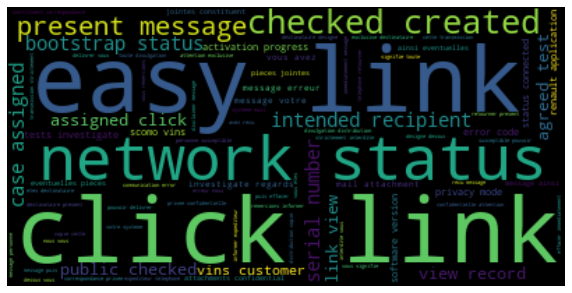

In [12]:
# Create a WordCloud object
wordcloud = WordCloud().generate(description)
plt.figure(figsize=(10, 6))
# Display the generated word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
new_df=df[['combine_description_cleanned','priority']]

In [14]:
new_df=new_df.dropna(axis=0)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer  #text vectorizing using Tfidf vectorizer

In [16]:
vect=TfidfVectorizer(max_features=4000)  #creating object of tfidf vectorizer

In [17]:
X=vect.fit_transform(new_df['combine_description_cleanned'])  #vectorizing review_body of training reviews

In [18]:
y=new_df.priority

# Imbalance Data

In [19]:
# the given data has imbalace classes so we need to balance that.

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='priority', ylabel='count'>

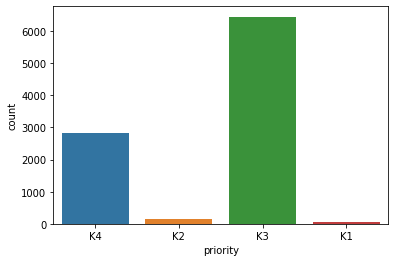

In [20]:
sns.countplot(y)

# Data Balancing (Oversampling)

In [21]:
# we balanced the data by creating synthetic data (oversampling) uisng SMOTE a KNN based method

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
os=SMOTE()

In [24]:
X,y=os.fit_resample(X,y)

# Balanced Data

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='priority', ylabel='count'>

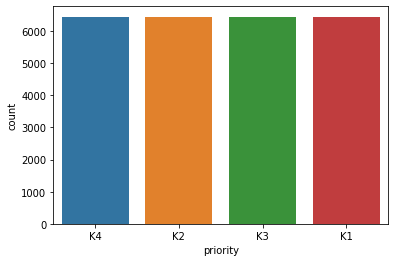

In [25]:
sns.countplot(y)

# Data Split into Training and Testing

In [53]:
from sklearn.model_selection import train_test_split  #importing train test split from sklearn

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=42,shuffle=True)

# Models Training

+ ==================================================================================================== +
			1-For Support Vector Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9555857253685027
--------------------------------------------------
F1 :  [0.94539527 0.9393718  0.97437888 0.96383648]
--------------------------------------------------
Reacll :  [0.89992242 0.99767261 0.97362296 0.9511249 ]
--------------------------------------------------
Precision :  [0.99570815 0.88750863 0.97513598 0.97689243]
--------------------------------------------------
cross validation accuracy :  0.9546089608483029
--------------------------------------------------
Confusion Matrix....
 [[1160  129    0    0]
 [   3 1286    0    0]
 [   0    5 1255   29]
 [   2   29   32 1226]]
--------------------------------------------------
Classification Report....
               precision    recall

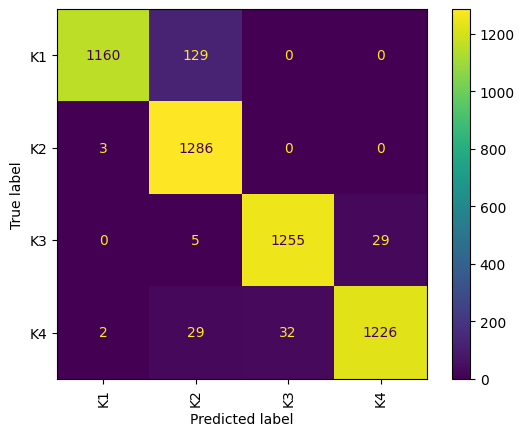

							-----------------------------------------------------------
							 Time for detection (Support Vector Classifier) : 180.321 seconds...
							-----------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ ==================================================================================================== +
			2-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9439487975174554
--------------------------------------------------
F1 :  [0.94715611 0.92551277 0.9601892  0.94477553]
--------------------------------------------------
Reacll :  [0.91078355 0.99767261 0.94491854 0.92242048]
--------------------------------------------------
Precision :  [0.98655462 0.86308725 0.97596154 0.96824104]
--------------------------------------------------
cross validation accuracy :  0.9418450983062684
--------------------------------------------------
Confusion Matrix....
 [[1174  115    0    0]
 [   3 1286    0    0]
 [   3   29 1218   39]
 [  10   60   30 1189]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-sc

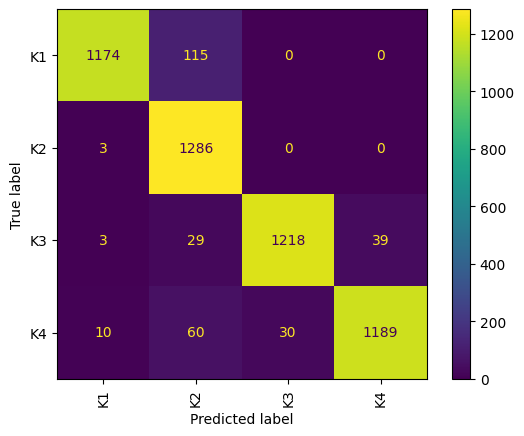

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 11.986 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9003103180760279
--------------------------------------------------
F1 :  [0.93923481 0.90123894 0.82379655 0.9240168 ]
--------------------------------------------------
Reacll :  [0.97129558 0.98758728 0.70364624 0.93871218]
--------------------------------------------------
Precision :  [0.90922295 0.82877604 0.99342826 0.90977444]
--------------------------------------------------
cross validation accuracy :  0.8920315600406032
--------------------------------------------------
Confusion Matrix....
 [[1252

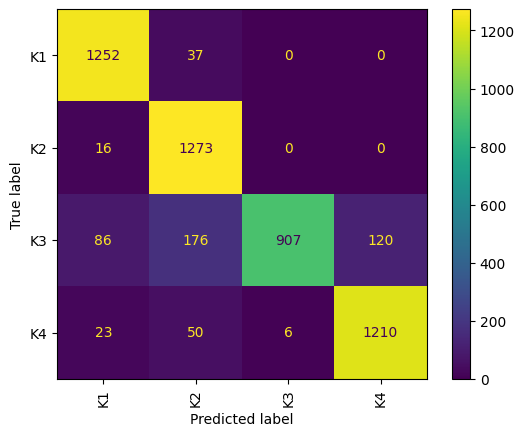

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 825.714 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9757564003103181
--------------------------------------------------
F1 :  [0.98785742 0.97577593 0.97050727 0.96891997]
--------------------------------------------------
Reacll :  [0.97827773 1.         0.95733126 0.9674166 ]
--------------------------------------------------
Precision :  [0.99762658 0.95269771 0.98405104 0.97042802]
--------------------------------------------------
cross validation accuracy :  0.9759466770607672
--------------------------------------------------
Confusion Matrix....
 [

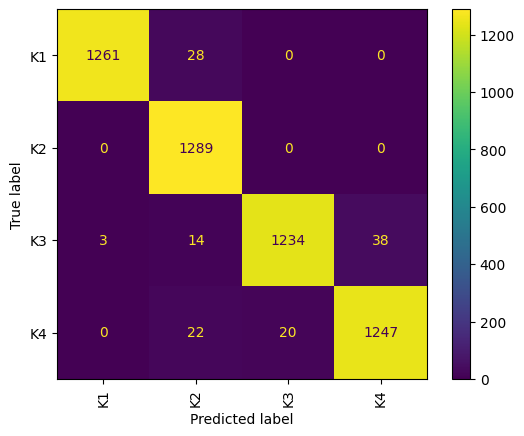

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 65.71 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Naive Bayes The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9352211016291699
--------------------------------------------------
F1 :  [0.95694135 0.92349304 0.92765273 0.93154996]
--------------------------------------------------
Reacll :  [1.         0.92707525 0.89526765 0.91854151]
--------------------------------------------------
Precision :  [0.91743772 0.91993841 0.96246872 0.94493216]
--------------------------------------------------
cross validation accuracy :  0.9307881432008062
--------------------------------------------------
Confusion Matrix....
 [[1289    0 

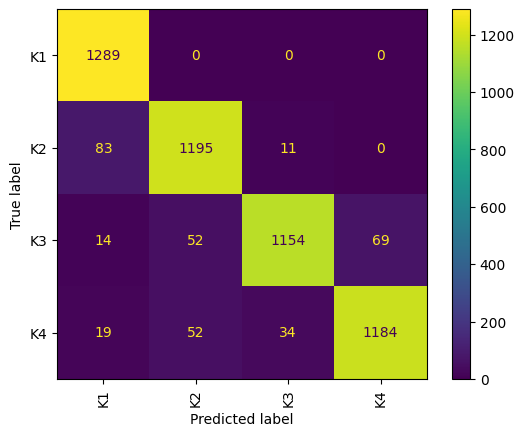

							-----------------------------------------------------------
							 Time for detection (Naive Bayes) : 1.113 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.9681923972071373
--------------------------------------------------
F1 :  [0.98051442 0.97344461 0.96069182 0.95791115]
--------------------------------------------------
Reacll :  [0.97595035 0.99534523 0.94802172 0.95345229]
--------------------------------------------------
Precision :  [0.98512138 0.95248701 0.97370518 0.9624119 ]
--------------------------------------------------
cross validation accuracy :  0.9670236854560599
--------------------------------------------------
Confusion Matrix....
 [[1258   31 

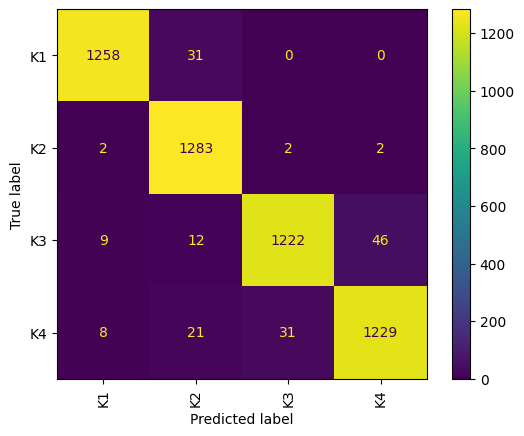

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 17.179 seconds...
							-----------------------------------------------------------



,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,Support Vector Classifier,0.955586,"[0.9957081545064378, 0.8875086266390614, 0.975...","[0.899922420480993, 0.9976726144297905, 0.9736...","[0.9453952730236349, 0.9393718042366692, 0.974...","[[1160, 129, 0, 0], [3, 1286, 0, 0], [0, 5, 12..."
1,LogisitcRegression,0.943949,"[0.9865546218487395, 0.8630872483221477, 0.975...","[0.9107835531419706, 0.9976726144297905, 0.944...","[0.9471561113352158, 0.925512774379273, 0.9601...","[[1174, 115, 0, 0], [3, 1286, 0, 0], [3, 29, 1..."
2,KNeighborsClassifier,0.900310,"[0.9092229484386347, 0.8287760416666666, 0.993...","[0.9712955779674166, 0.9875872769588828, 0.703...","[0.9392348087021756, 0.9012389380530973, 0.823...","[[1252, 37, 0, 0], [16, 1273, 0, 0], [86, 176,..."
3,RandomForestClassifier,0.975756,"[0.997626582278481, 0.9526977087952697, 0.9840...","[0.978277734678045, 1.0, 0.9573312645461598, 0...","[0.9878574226400314, 0.975775927327782, 0.9705...","[[1261, 28, 0, 0], [0, 1289, 0, 0], [3, 14, 12..."
4,Naive Bayes,0.935221,"[0.9174377224199288, 0.9199384141647421, 0.962...","[1.0, 0.9270752521334368, 0.8952676493405741, ...","[0.9569413511507052, 0.9234930448222565, 0.927...","[[1289, 0, 0, 0], [83, 1195, 11, 0], [14, 52, ..."
5,DecisionTreeClassifier,0.968192,"[0.985121378230227, 0.9524870081662955, 0.9737...","[0.9759503491078355, 0.9953452288595811, 0.948...","[0.980514419329696, 0.9734446130500758, 0.9606...","[[1258, 31, 0, 0], [2, 1283, 2, 2], [9, 12, 12..."


In [66]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,\
classification_report,ConfusionMatrixDisplay

# check the performance on diffrent regressor
models = []
models.append(('Support Vector Classifier', svm.SVC()))
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('Naive Bayes', MultinomialNB()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    
    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=["K1","K2","K3","K4"])
    disp.plot()
    plt.xticks(rotation=90)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})